In [21]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from pathlib import Path
import pandas as pd

In [22]:
blender = pd.read_csv('output/blender_results.csv')
brewer = pd.read_csv('output/brewer_results.csv')
batch = pd.read_csv('output/batch_results.csv')

np.int64(4582)

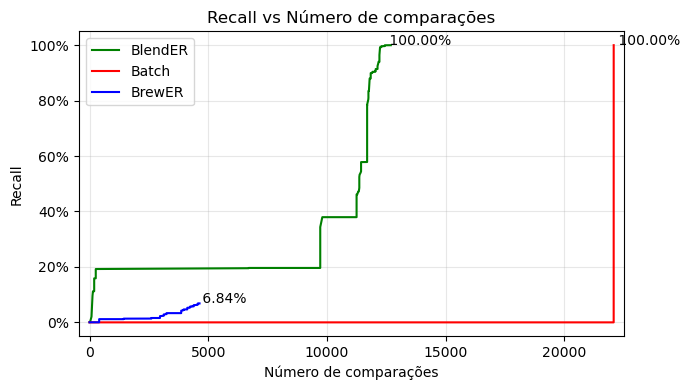

Salvo: output\recall_vs_comparisons.png


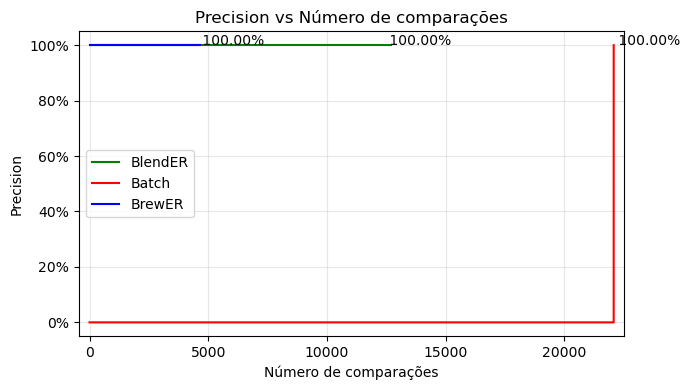

Salvo: output\precision_vs_comparisons.png


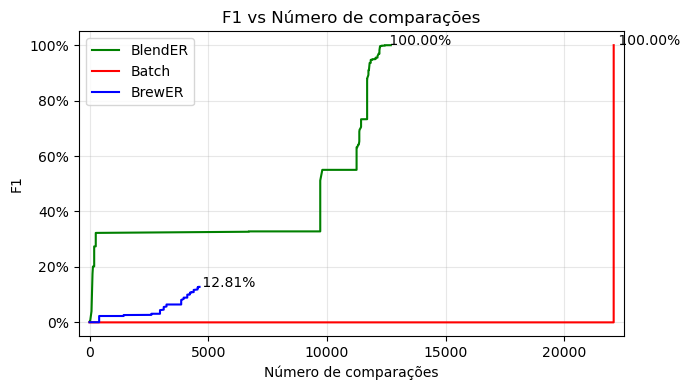

Salvo: output\f1_vs_comparisons.png


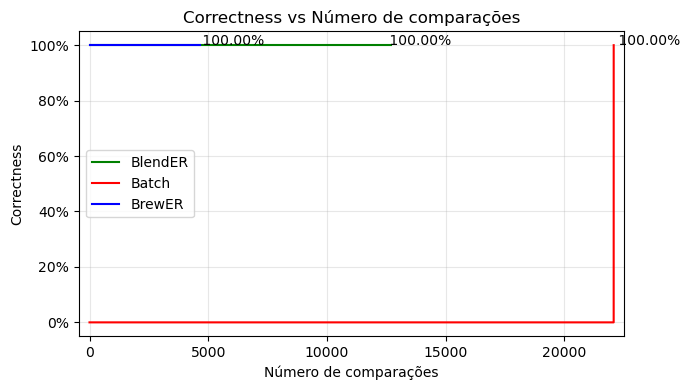

Salvo: output\correctness_vs_comparisons.png


In [60]:
metrics = ["recall", "precision", "f1", "correctness"]
comparisons_col = "comparisons"

out_dir = Path("output")
out_dir.mkdir(parents=True, exist_ok=True)

brewer_max_comp = brewer[comparisons_col].max()
blender_max_comp = blender[comparisons_col].max()
batch_max_comp = batch[comparisons_col].max()
xlim = batch_max_comp / 50

for m in metrics:
    plt.figure(figsize=(7, 4))
    plt.plot(blender[comparisons_col], blender[m], label="BlendER", color="green")
    plt.annotate(
        f"{blender[m].max() * 100 : 0.2f}%",
        xy=(int(blender.iloc[int(blender['recall'].idxmax())][comparisons_col]), blender[m].max()),
        xycoords="data",
    )
    plt.plot(batch[comparisons_col], batch[m], label="Batch", color="red")
    plt.annotate(
        f"{batch[m].max() * 100 : 0.2f}%",
        xy=(int(batch.iloc[int(batch['recall'].idxmax())][comparisons_col]), batch[m].max()),
        xycoords="data",
    )
    plt.plot(brewer[comparisons_col], brewer[m], label="BrewER", color="blue")
    plt.xlabel("Número de comparações")
    plt.annotate(
        f"{brewer[m].max() * 100 : 0.2f}%",
        xy=(int(brewer.iloc[int(brewer['recall'].idxmax())][comparisons_col]), brewer[m].max()),
        xycoords="data",
    )
    plt.ylabel(m.capitalize())
    plt.title(f"{m.capitalize()} vs Número de comparações")
    plt.grid(True, alpha=0.3)
    plt.xlim([0 - xlim, batch_max_comp + xlim])
    plt.ylim([-0.05, 1.05])
    plt.legend(loc="best")
    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))

    png_path = out_dir / f"{m}_vs_comparisons.png"
    plt.tight_layout()
    plt.savefig(png_path, dpi=150)
    plt.show()
    print(f"Salvo: {png_path}")